<a href="https://colab.research.google.com/github/diabateyoussouf/CFAIR10-Classification/blob/main/TpDeepL_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABATE YOUSSOUF SDIA MS3
# TP DeepLearning:
Le problème consiste à résoudre une classification multiclasse sur 10 classes (par exemple : dog, cat, airplane, etc.). Nous avons utilisé K-Fold pour identifier le meilleur modèle.

Nous avons d’abord testé un modèle séquentiel basique (couches Dense après Flatten), mais il n’a pas permis d’obtenir de bonnes performances. Même en utilisant un modèle pré-entraîné comme **ResNet50** sur des images **32×32**, les résultats restaient limités.

La solution efficace a été d’adopter un **CNN** composé de 4 blocs convolutifs, capable d’extraire les caractéristiques locales des images et d’améliorer significativement la performance du modèle.

# **Exercice :**

### CIFAR-10

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


1. Chargement de donnée CIFAR-10

In [2]:
# charger donner CIFAR-10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

2. Réaliser le prétraitement des données :


*   Normaliser les données d’entrée ;
*   Transformer les étiquettes de classes en encodage one-hot.



In [4]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [5]:
X_train = X_train/255
X_test  = X_test/255

In [6]:
""" train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_generator = ImageDataGenerator(
    rescale=1./255
)
"""

' train_generator = ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n)\ntest_generator = ImageDataGenerator(\n    rescale=1./255\n)\n'

3. Visualiser quelques images de l’ensemble d’apprentissage.

In [7]:
import matplotlib.pyplot as plt


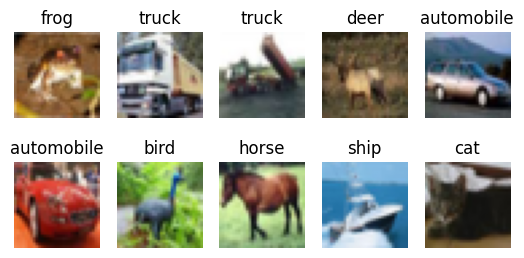

In [8]:

iter = 10
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(iter):
  plt.subplot(3,5,i+1)
  plt.imshow(X_train[i])
  plt.title(label[y_train[i].argmax()])
  plt.axis('off')
plt.show()

4. Écriver une fonction build_model() qui construit et compile un réseau de neurones entièrement connecté . Le modèle doit respecter les critères suivants :


*   Prend en entrée la dimension des données ;
*   Comprendre 4 couches cachées, chacune avec 128 neurones et la fonction d’activation ReLU;
*   Avoir une couche de sortie adaptée à la classification multi-classes (10 classes);


In [9]:
def build_model(input_shape):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model


In [10]:
from tensorflow.keras.applications import ResNet50

In [11]:
rest_net = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

rest_net.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D,
    BatchNormalization, Dropout,
    GlobalAveragePooling2D, Dense
)
from tensorflow.keras.optimizers import Adam

def build_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential([
        Input(shape=input_shape),

        # Bloc 1
        Conv2D(32, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(32, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        # Bloc 2
        Conv2D(64, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.30),

        # Bloc 3
        Conv2D(128, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.40),

        # Classification
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [13]:
model = build_model(X_train[0].shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,170 (1.69 MB)

 Trainable params: 444,170 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

5. Mettre en place une méthode de validation croisée à l’aide de la classe KFold.

In [15]:
from sklearn.model_selection import KFold

In [16]:
def curve(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epoch')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

In [21]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

histories = []
val_scores = []
best_model = None
best_val_acc = 0

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):


    print(f"=="*50)
    print(f"Fold {fold + 1}")

    X_train_cv = X_train[train_idx]
    X_val_cv   = X_train[val_idx]

    y_train_cv = y_train[train_idx]
    y_val_cv   = y_train[val_idx]

    model = build_cnn(X_train[0].shape)

    history = model.fit(
        X_train_cv,
        y_train_cv,
        epochs=20,
        batch_size=32,
        validation_data=(X_val_cv, y_val_cv),
        verbose=1
    )

    # Évaluation sur validation uniquement
    val_loss, val_acc = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    val_scores.append(val_acc)

    # Sélection du meilleur modèle
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model

    histories.append(history)


Fold 1
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3290 - loss: 1.8315 - val_accuracy: 0.4531 - val_loss: 1.4922
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5384 - loss: 1.2810 - val_accuracy: 0.6206 - val_loss: 1.0316
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6044 - loss: 1.1247 - val_accuracy: 0.6384 - val_loss: 1.0498
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6404 - loss: 1.0176 - val_accuracy: 0.6762 - val_loss: 0.9207
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6729 - loss: 0.9397 - val_accuracy: 0.7228 - val_loss: 0.7697
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6950 - loss: 0.8843 - val_accuracy: 0.7324 - val_loss: 0.7574
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7119 - loss: 0.8286 - val_accuracy: 0.7653 - val_loss: 0.6688
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7223 - loss: 0

7. Afficher la précision moyenne, l’écart-type et l’indice du meilleur fold.

In [22]:
import numpy as np
mean_val_acc = np.mean(val_scores)
std_val_acc = np.std(val_scores)
best_fold_idx = np.argmax(val_scores)

In [23]:
print(f"Précision moyenne sur validation: {mean_val_acc}")
print(f"Ecart-type sur validation: {std_val_acc}")
print(f"Meilleur fold: {best_fold_idx + 1}")

Précision moyenne sur validation: 0.8018200039863587
Ecart-type sur validation: 0.010059104289364455
Meilleur fold: 2


8. Tracer et analyser les courbes d’évolution de la fonction de perte et de la précision en fonction
des époques, pour les ensembles d’apprentissage et de validation, en utilisant l’historique du
meilleur fold issu de la validation croisée.

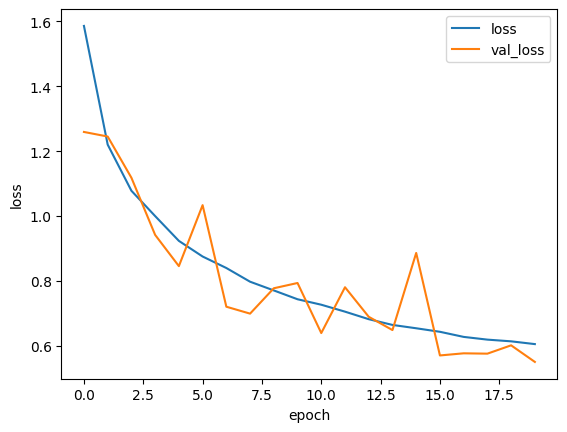

In [24]:
curve(histories[best_fold_idx],'loss')

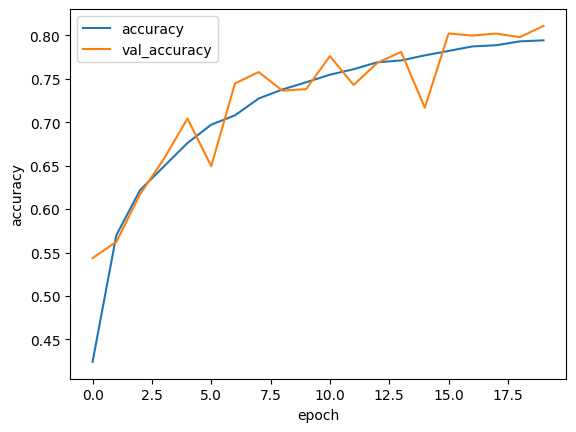

In [25]:
curve(histories[best_fold_idx],'accuracy')

9. Évaluer les performances finales du modèle sur l’ensemble de test.

In [26]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Précision sur l'ensemble de test: {test_acc}")

Précision sur l'ensemble de test: 0.8105999827384949


10. Afficher les résultats de prédiction pour 5 images de test. Pour chaque image, présenter les
probabilités fournies par la fonction softmax ainsi que la classe prédite par le modèle.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


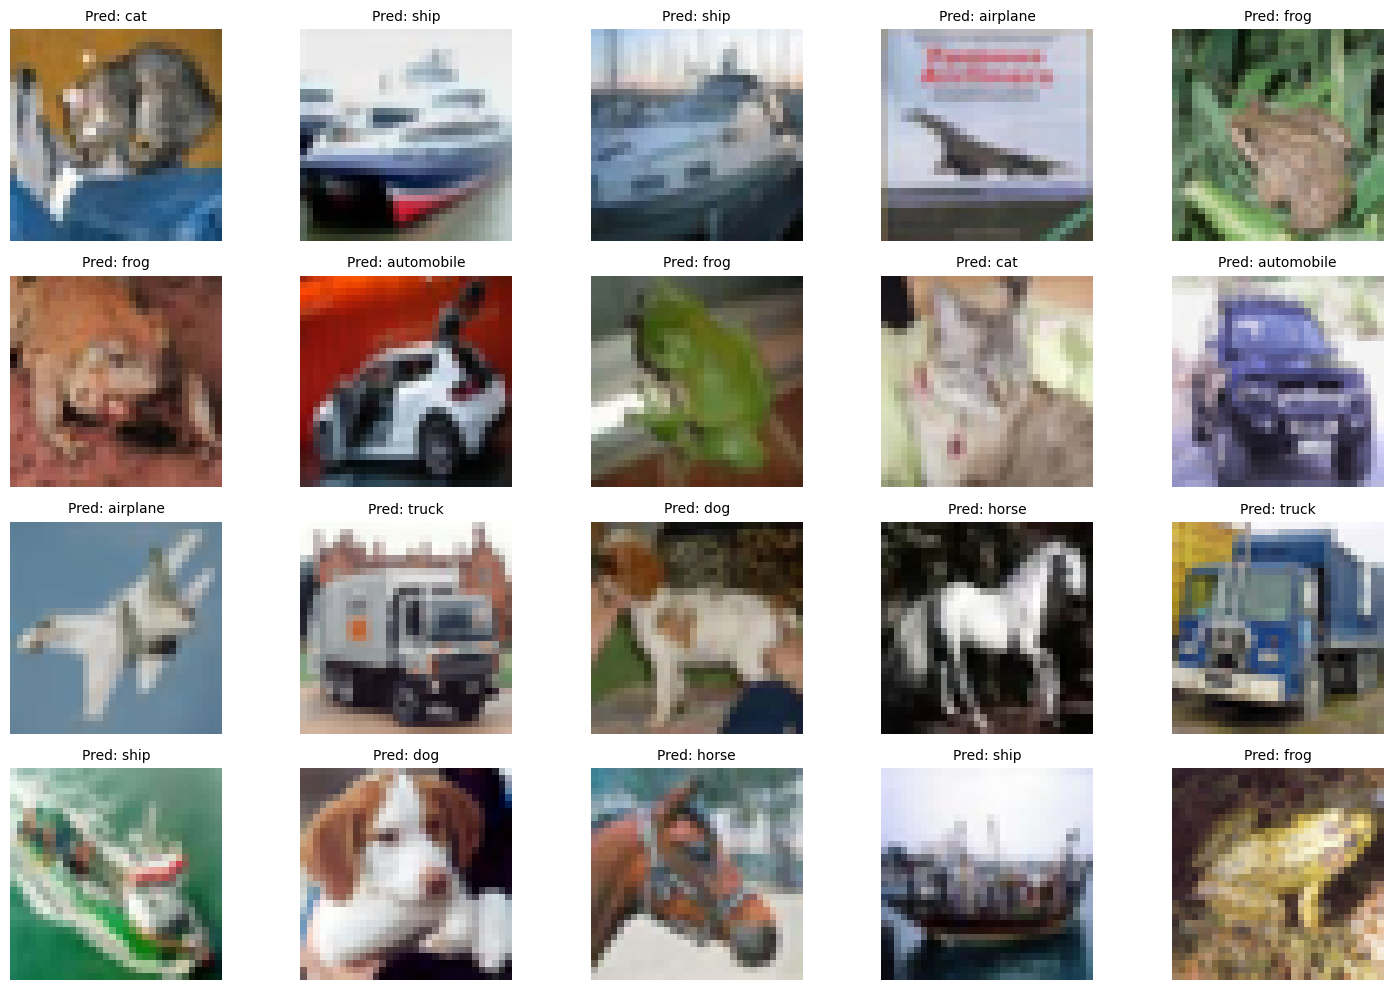

In [28]:
import matplotlib.pyplot as plt
import numpy as np

predictions = best_model.predict(X_test[:20])
images = X_test[:20]

plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Pred: {label[np.argmax(predictions[i])]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


11. Pour une image donnée, comparer la classe prédite avec la classe réelle et analyser la qualité
de la prédiction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


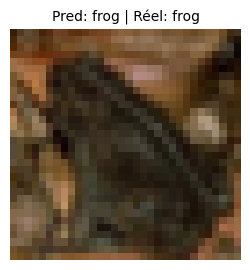

In [37]:
image = X_test[30]
image_batch = np.expand_dims(image, axis=0)

prediction = best_model.predict(image_batch)
predicted_class = np.argmax(prediction)

true_class = np.argmax(y_test[30])

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.title(
    f"Pred: {label[predicted_class]} | Réel: {label[true_class]}",
    fontsize=10
)
plt.axis('off')
plt.show()


Le modèle reussi à prédire avec 72% de confiance.

12. Construire et analyser la matrice de confusion afin d’identifier les classes correctement reconnues
et celles pour lesquelles le modèle rencontre le plus de difficultés.

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [40]:
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [41]:
cm = confusion_matrix(y_true, y_pred_classes)

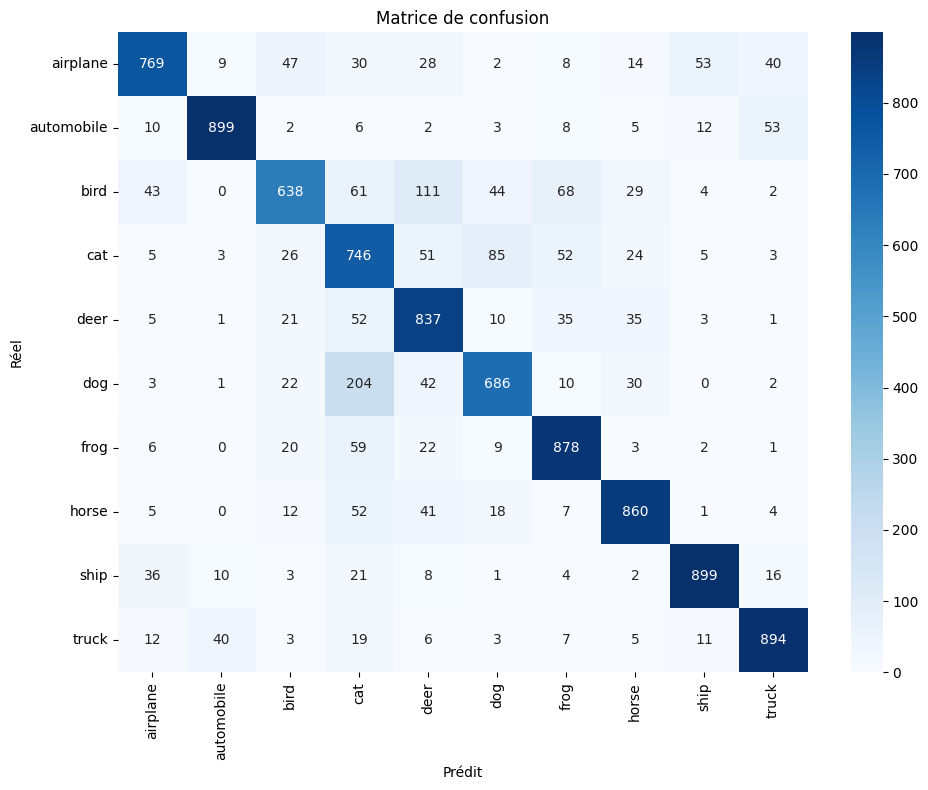

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sn.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label,
    yticklabels=label
)

plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.tight_layout()
plt.show()
